/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Use the colorbar set_ticks() method instead.



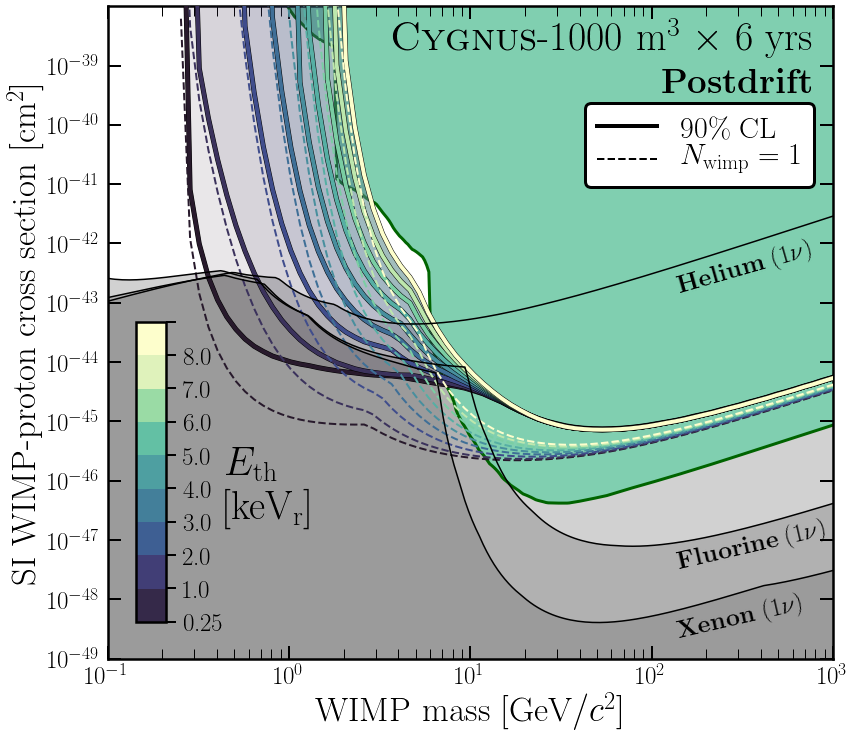

In [57]:
from numpy import *
from PlotFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean

RS = 1.0
Vs = '1000'
fna = 'Postdrift'
ths = array(['250eV','1keV','2keV','3keV','4keV','5keV','6keV','7keV','8keV'])
nths = size(ths)
cols = cmocean.cm.deep_r(linspace(0.0,1.0,nths))

fig,ax = MakeLimitPlot_SI(NuFloor=False,Annotations=False,ymax=1.0e-38,ymin=1.0e-49,xmax=1.0e3,Collected=True)

maxy1 = 1.0e-30
m,sigend = getlimSI(Vs,fna+'_'+str(ths[-1]),RS,maxy1)
for i in range(0,nths):
    eths = '_'+str(ths[i])
    m,sig1 = getlimSI(Vs,fna+eths,RS,maxy1)
    m,sig1w = get1wimpSI(Vs,fna+eths,1.0,maxy1)
    ax.fill_between(m,sig1,y2=sigend,color=cols[i,:],zorder=11,alpha=0.1)
    ax.plot(m,sig1,linestyle='-',color='k',linewidth=5,zorder=11)
    ax.plot(m,sig1,linestyle='-',color=cols[i,:],linewidth=4,zorder=11)
    ax.plot(m,sig1w,linestyle='--',color=cols[i,:],linewidth=2,zorder=11)

plt.gcf().text(0.88,0.83,r'{\sc Cygnus}-1000 m$^3$ $\times$ 6 yrs',fontsize=40,color='k',horizontalalignment='right')
plt.gcf().text(0.88,0.78,r'{\bf '+fna+r'}',fontsize=35,color='k',horizontalalignment='right')

thb = append(0.25,arange(1,10))

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="15%", height="30%", bbox_to_anchor=[-20, -550, 200, 1000]) 
norm = mpl.colors.Normalize(vmin=0,vmax=8)
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.deep_r, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=thb,boundaries=thb,orientation='vertical')
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticks(thb[0:-1])
cbar.set_yticklabels(thb[0:-1])  # vertically oriented colorbar
cbar.tick_params(labelsize=25) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.25,0.33,r'$E_{\rm th}$',fontsize=40,color='k')
plt.gcf().text(0.25,0.28,r'[keV$_{\rm r}]$',fontsize=40,color='k')

# Legend
ax.plot(-1,-1,'-',color='k',lw=4,label=r'$90\%$ CL')
ax.plot(-1,-1,'--',color='k',lw=2,label=r'$N_{\rm wimp} = 1$')
leg1 = ax.legend(fontsize=30,frameon=True,loc="lower right",framealpha=1.0,ncol=1,columnspacing=0.5,labelspacing=0.1,bbox_to_anchor=(0.995,0.7))
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")

plt.gcf().text(0.73,0.15,r'{\bf Xenon} (1$\nu$)',color='k',fontsize=25,rotation=13)
plt.gcf().text(0.73,0.55,r'{\bf Helium} (1$\nu$)',color='k',fontsize=25,rotation=16)
plt.gcf().text(0.73,0.23,r'{\bf Fluorine} (1$\nu$)',color='k',fontsize=25,rotation=13)


# Nufloor
nu_Xe = loadtxt("../data/WIMPLimits/SI/NuFloor_1event_Xe.txt")
nu_F = loadtxt("../data/WIMPLimits/SI/NuFloor_1event_F.txt")
nu_He = loadtxt("../data/WIMPLimits/SI/NuFloor_1event_He.txt")

ax.plot(nu_He[:,0], nu_He[:,1]/2.2,'-',lw=1.5,color='k',zorder=12)
ax.plot(nu_Xe[:,0], nu_Xe[:,1]/2.2,'-',lw=1.5,color='k',zorder=12)
ax.plot(nu_F[:,0], nu_F[:,1]/2.2,'-',lw=1.5,color='k',zorder=12)
ax.fill_between(nu_He[:,0], nu_He[:,1]/2.2, y2=1.0e-50,facecolor='dimgrey',alpha=0.3,zorder=0)
ax.fill_between(nu_F[:,0], nu_F[:,1]/2.2, y2=1.0e-50,facecolor='dimgrey',alpha=0.3,zorder=0)
ax.fill_between(nu_Xe[:,0], nu_Xe[:,1]/2.2, y2=1.0e-50,facecolor='dimgrey',alpha=0.3,zorder=0)
        
plt.show()

fig.savefig('../plots/CYGNUS1000-'+fna+'_th_SI.pdf',bbox_inches='tight')



/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Use the colorbar set_ticks() method instead.



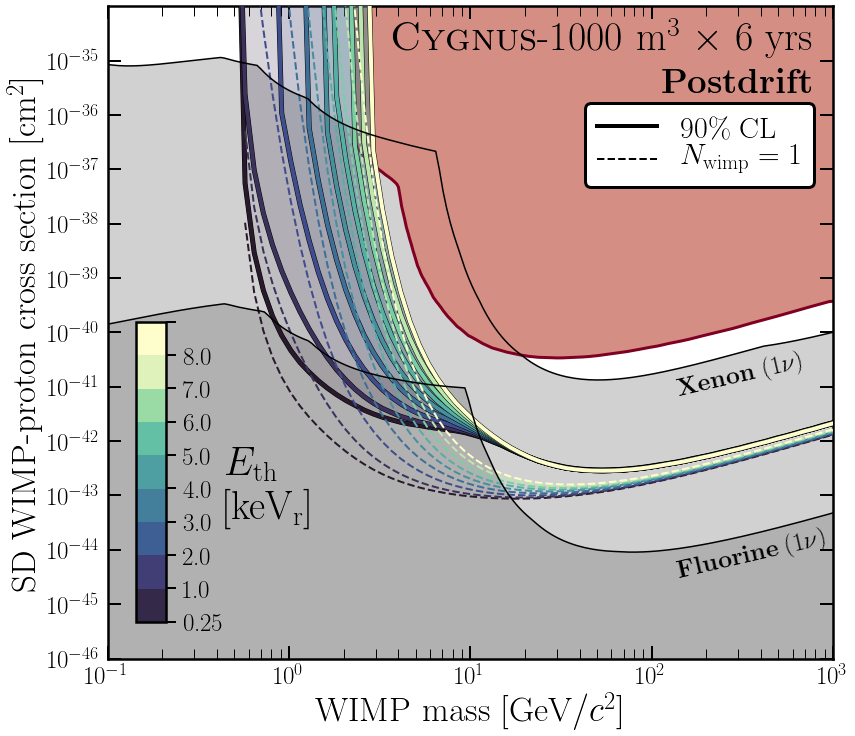

In [58]:
fig,ax = MakeLimitPlot_SD(NuFloor=False,Annotations=False,xmax=1.0e3,ymin=1.0e-46,Collected=True)

# Enhancement factor
A = 19
S_p = 0.478
J = 0.5
C_F = (4/3)*((J+1)/J)*(S_p)**2.0/A**2

maxy1 = 1.0e-30
m,sigend = getlimSD(Vs,fna+'_'+str(ths[-1]),C_F*1.0,maxy1)
sigend[isnan(sigend)] = maxy1
for i in range(0,nths):
    eths = '_'+str(ths[i])
    m,sig1 = getlimSD(Vs,fna+eths,C_F*1.0,maxy1)
    sig1[isnan(sig1)] = maxy1
    m,sig1w = get1wimpSD(Vs,fna+eths,C_F,maxy1)
    ax.fill_between(m,sig1,y2=sigend,color=cols[i,:],zorder=11,alpha=0.1)
    ax.plot(m,sig1,linestyle='-',color='k',linewidth=5,zorder=11)
    ax.plot(m,sig1,linestyle='-',color=cols[i,:],linewidth=4,zorder=11)
    ax.plot(m,sig1w,linestyle='--',color=cols[i,:],linewidth=2,zorder=11)

plt.gcf().text(0.88,0.83,r'{\sc Cygnus}-1000 m$^3$ $\times$ 6 yrs',fontsize=40,color='k',horizontalalignment='right')
plt.gcf().text(0.88,0.78,r'{\bf '+fna+r'}',fontsize=35,color='k',horizontalalignment='right')



thb = append(0.25,arange(1,10))

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="15%", height="30%", bbox_to_anchor=[-20, -550, 200, 1000]) 
norm = mpl.colors.Normalize(vmin=0,vmax=8)
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.deep_r, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=thb,boundaries=thb,orientation='vertical')
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticks(thb[0:-1])
cbar.set_yticklabels(thb[0:-1])  # vertically oriented colorbar
cbar.tick_params(labelsize=25) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.25,0.33,r'$E_{\rm th}$',fontsize=40,color='k')
plt.gcf().text(0.25,0.28,r'[keV$_{\rm r}]$',fontsize=40,color='k')

# Legend
ax.plot(-1,-1,'-',color='k',lw=4,label=r'$90\%$ CL')
ax.plot(-1,-1,'--',color='k',lw=2,label=r'$N_{\rm wimp} = 1$')
leg1 = ax.legend(fontsize=30,frameon=True,loc="lower right",framealpha=1.0,ncol=1,columnspacing=0.5,labelspacing=0.1,bbox_to_anchor=(0.995,0.7))
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")

plt.gcf().text(0.73,0.43,r'{\bf Xenon} (1$\nu$)',color='k',fontsize=25,rotation=13)
plt.gcf().text(0.73,0.22,r'{\bf Fluorine} (1$\nu$)',color='k',fontsize=25,rotation=13)


# Nufloor
nu_Xe = loadtxt("../data/WIMPLimits/SI/NuFloor_1event_Xe.txt")
nu_F = loadtxt("../data/WIMPLimits/SI/NuFloor_1event_F.txt")
C_F = 0.001898759002770083
C_Xe = 6.68806790591069e-08
ax.plot(nu_Xe[:,0], nu_Xe[:,1]/(C_Xe),'-',lw=1.5,color='k',zorder=12)
ax.plot(nu_F[:,0], nu_F[:,1]/(C_F),'-',lw=1.5,color='k',zorder=12)
ax.fill_between(nu_F[:,0], nu_F[:,1]/(C_F), y2=1.0e-50,facecolor='dimgrey',alpha=0.3,zorder=0)
ax.fill_between(nu_Xe[:,0], nu_Xe[:,1]/(C_Xe), y2=1.0e-50,facecolor='dimgrey',alpha=0.3,zorder=0)
  

plt.show()

fig.savefig('../plots/CYGNUS1000-'+fna+'_th_SD.pdf',bbox_inches='tight')



In [62]:
append(0.25,arange(1,9))

array([0.25, 1.  , 2.  , 3.  , 4.  , 5.  , 6.  , 7.  , 8.  ])